In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import xgboost as xgb

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display


In [24]:
# !pip install xgboost


ERROR: Could not find a version that satisfies the requirement pandas.tools.plotting (from versions: none)
ERROR: No matching distribution found for pandas.tools.plotting


# Exploring "games" csv

In [34]:
#load data
games = pd.read_csv('Data/games.csv')
games.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0


In [36]:
games['pts_diff'] = games['PTS_home'] - games['PTS_away']
games['fg_pct_diff'] = games['FG_PCT_home'] - games['FG_PCT_away']
games['ft_pct_diff'] = games['FT_PCT_home'] - games['FT_PCT_away']
games['ast_diff'] = games['AST_home'] - games['AST_away']
games['reb_diff'] = games['REB_home'] - games['REB_away']

In [43]:
games_diff = games[['HOME_TEAM_WINS', 'pts_diff', 'fg_pct_diff', 'ft_pct_diff', 'ast_diff', 'reb_diff']]
games_diff.head(3)

,HOME_TEAM_WINS,pts_diff,fg_pct_diff,ft_pct_diff,ast_diff,reb_diff
0,1,3.0,-0.011,-0.072,2.0,-2.0
1,1,3.0,0.025,-0.022,6.0,-6.0
2,0,-1.0,-0.022,-0.093,-3.0,-4.0


In [37]:
games.dtypes

GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
pts_diff            float64
fg_pct_diff         float64
ft_pct_diff         float64
ast_diff            float64
reb_diff            float64
dtype: object

In [44]:
# Home team win rate

n_matches = games_diff.shape[0]

n_features = games_diff.shape[1] - 1

n_homewins = len(games_diff[games_diff.HOME_TEAM_WINS == 1])

win_rate = (float(n_homewins) / (n_matches)) * 100

print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 23520
Number of features: 5
Number of matches won by home team: 13901
Win rate of home team: 59.10%


array([[<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='HOME_TEAM_WINS'>,
        <AxesSubplot:xlabel='pts_diff', ylabel='HOME_TEAM_WINS'>,
        <AxesSubplot:xlabel='fg_pct_diff', ylabel='HOME_TEAM_WINS'>,
        <AxesSubplot:xlabel='ft_pct_diff', ylabel='HOME_TEAM_WINS'>,
        <AxesSubplot:xlabel='ast_diff', ylabel='HOME_TEAM_WINS'>,
        <AxesSubplot:xlabel='reb_diff', ylabel='HOME_TEAM_WINS'>],
       [<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='pts_diff'>,
        <AxesSubplot:xlabel='pts_diff', ylabel='pts_diff'>,
        <AxesSubplot:xlabel='fg_pct_diff', ylabel='pts_diff'>,
        <AxesSubplot:xlabel='ft_pct_diff', ylabel='pts_diff'>,
        <AxesSubplot:xlabel='ast_diff', ylabel='pts_diff'>,
        <AxesSubplot:xlabel='reb_diff', ylabel='pts_diff'>],
       [<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='fg_pct_diff'>,
        <AxesSubplot:xlabel='pts_diff', ylabel='fg_pct_diff'>,
        <AxesSubplot:xlabel='fg_pct_diff', ylabel='fg_pct_diff'>,
        <AxesSubplot

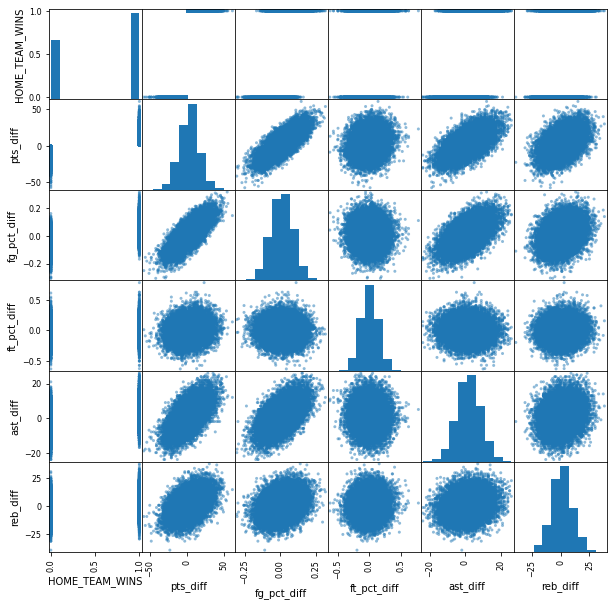

In [46]:
from pandas.plotting import scatter_matrix

scatter_matrix(games_diff[['HOME_TEAM_WINS','pts_diff','fg_pct_diff','ft_pct_diff','ast_diff','reb_diff']], figsize=(10,10))

# Games Details

In [ ]:
games_details_df = pd.read_csv('Data/games_details.csv')
games_details_df.head()

In [ ]:
games_combined_df = 

In [ ]:
players_df = pd.read_csv('Data/players.csv')
players_df.head()

In [ ]:
ranking_df = pd.read_csv('Data/ranking.csv')
ranking_df.head()

In [ ]:
teams_df = pd.read_csv('Data/teams.csv')
teams_df.head()